# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise e Previsão de Séries Temporais com Inteligência Artificial</font>

## <font color='blue'>Projeto 2 - Parte 1</font>
### <font color='blue'>Prevendo a Relação do Preço de Commodities e Mudanças Climáticas ao Longo do Tempo</font>
### <font color='blue'>Modelo MLP (MultiLayer Perceptron)</font>

![DSA](imagens/P2.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
!pip install -q tensorflow==2.11.0

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, explained_variance_score
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.5.3
plotly    : 5.9.0
tensorflow: 2.11.0
numpy     : 1.22.1
seaborn   : 0.12.2
matplotlib: 3.7.1
keras     : 2.11.0
sklearn   : 1.0.2



## Carregando os Dados

In [7]:
df = pd.read_csv('dados/dataset.csv')

In [8]:
df.shape

(124, 12)

In [9]:
df.head()

data  petroleo_bruto  minerio_ferro     ouro   arroz  feijao  milho  \
0  2012-12-01             323            455  3102.61  423.45   844.0  468.0   
1  2013-01-01             345            546  3100.45  415.85   799.0  485.0   
2  2013-02-01             362            595  3199.41  410.77   718.0  466.0   
3  2013-03-01             376            636  3281.67  414.82   614.0  442.0   
4  2013-04-01             383            738  3261.65  451.04   619.0  429.0   

    soja  trigo       cafe  algodao    umidade  
0  578.0  28.67  207.70504    117.7  79.261905  
1  557.0  24.49  228.94287      4.5  82.193548  
2  552.0  22.06  238.41747     25.1  74.839286  
3  574.0  21.64  218.47599     53.6  77.935484  
4  595.0  22.30  226.15010    166.0  80.450000

In [10]:
df.tail()

data  petroleo_bruto  minerio_ferro     ouro    arroz  feijao  \
119  2022-11-01             362            363  2626.91  1252.78  738.07   
120  2022-12-01             310            322  2736.64  1287.68  749.57   
121  2023-01-01             277            307  2842.81  1289.12  761.60   
122  2023-02-01             323            330  2936.19  1303.59  759.59   
123  2023-03-01             360            339  2847.84  1234.88  771.62   

      milho     soja  trigo       cafe  algodao    umidade  
119  427.49  1430.48  60.18  186.68326     38.2  77.950000  
120  385.09  1472.27  62.25  210.72987     33.7  76.177419  
121  373.03  1525.43  63.04  244.41912      4.6  74.774194  
122  390.69  1572.25  71.52  223.31732      6.9  66.910714  
123  396.87  1302.61  74.80  228.56676     41.5  69.000000

In [11]:
df.columns

Index(['data', 'petroleo_bruto', 'minerio_ferro', 'ouro', 'arroz', 'feijao',
       'milho', 'soja', 'trigo', 'cafe', 'algodao', 'umidade'],
      dtype='object')

In [12]:
# Converte a coluna de data em índice
df.index = pd.to_datetime(df['data'], format = '%Y.%m.%d')

In [13]:
del df['data']

In [14]:
df.head()

petroleo_bruto  minerio_ferro     ouro   arroz  feijao  milho  \
data                                                                        
2012-12-01             323            455  3102.61  423.45   844.0  468.0   
2013-01-01             345            546  3100.45  415.85   799.0  485.0   
2013-02-01             362            595  3199.41  410.77   718.0  466.0   
2013-03-01             376            636  3281.67  414.82   614.0  442.0   
2013-04-01             383            738  3261.65  451.04   619.0  429.0   

             soja  trigo       cafe  algodao    umidade  
data                                                     
2012-12-01  578.0  28.67  207.70504    117.7  79.261905  
2013-01-01  557.0  24.49  228.94287      4.5  82.193548  
2013-02-01  552.0  22.06  238.41747     25.1  74.839286  
2013-03-01  574.0  21.64  218.47599     53.6  77.935484  
2013-04-01  595.0  22.30  226.15010    166.0  80.450000

Text(0.5, 0, '\nData')

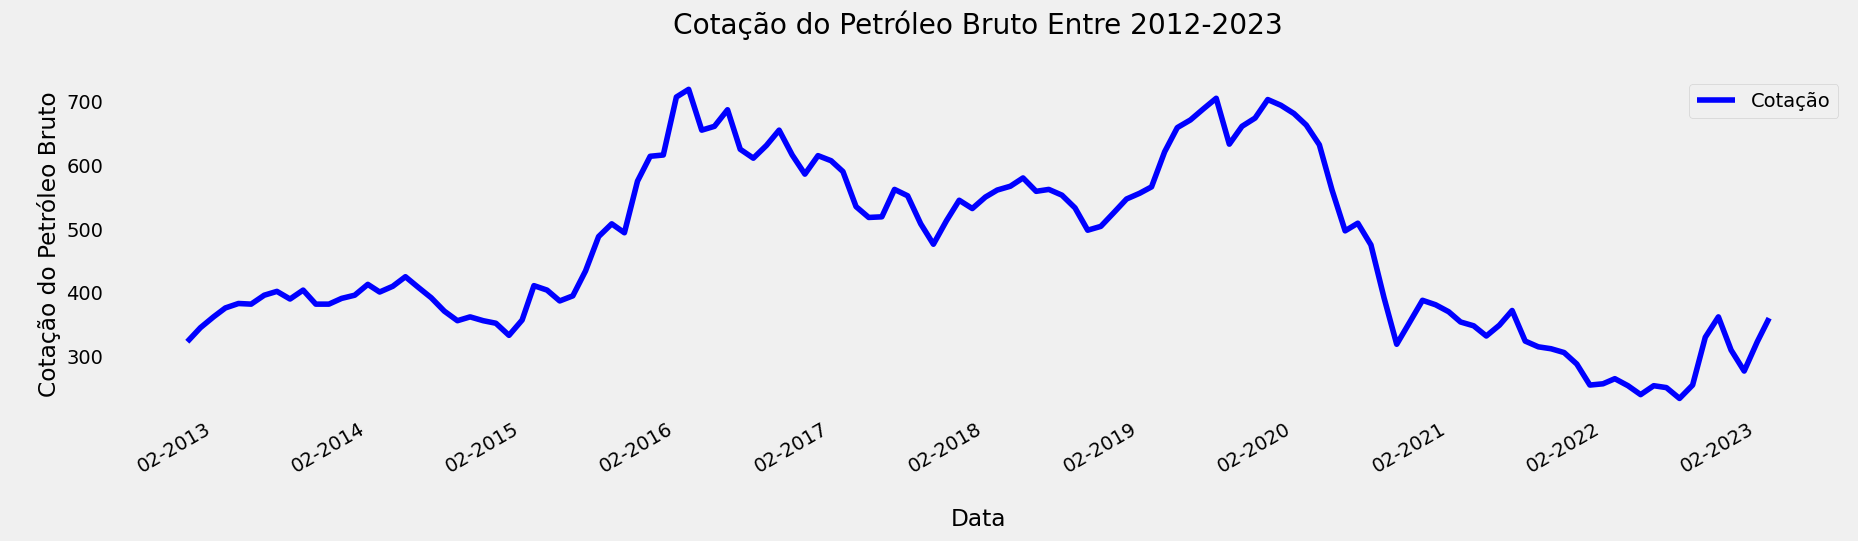

In [15]:
# Plot
plt.figure(figsize = (20,5))
plt.grid()
plt.plot(df.index, df['petroleo_bruto'], color = 'blue')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate() 
plt.legend(['Cotação'], loc='best')
plt.title('Cotação do Petróleo Bruto Entre 2012-2023\n')
plt.ylabel('\nCotação do Petróleo Bruto')
plt.xlabel('\nData')

In [16]:
# Plot da cotação de outros commodities
fig = make_subplots(rows = 10, cols = 1)

fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['minerio_ferro'],
                         name = 'Minério de Ferro'), row = 1, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['ouro'],
                         name = 'Ouro'), row = 2, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['arroz'],
                         name = 'Arroz'), row = 3, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['feijao'],
                         name = 'Feijão'), row = 4, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['milho'],
                         name = 'Milho'), row = 5, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['soja'],
                         name = 'Soja'), row = 6, col = 1

)
fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['trigo'],
                         name = 'Trigo'), row = 7, col = 1

)
fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['cafe'],
                         name = 'Café'), row = 8, col = 1

)
fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['cafe'],
                         name = 'algodao'), row = 9, col = 1

)
fig.add_trace(go.Scatter(x = df.reset_index()['data'], 
                         y = df.reset_index()['umidade'],
                         name = 'Umidade'), row = 10, col = 1

)
fig.update_layout(height = 1000, width = 1200, title_text = "Valores ao Longo do Tempo")
fig.show()

In [17]:
# Plot
plt.figure(figsize = (25,10))
ax = df.plot.area(fontsize = 10);
ax.set_xlabel('data');
ax.legend(fontsize=12);

<Figure size 2500x1000 with 0 Axes>

## Arquitetura Multilayer Perceptron (MLP)

Leia o manual em pdf no Capítulo 5.

### Pré-Processamento dos Dados

In [18]:
# Proporção de dados para treino e teste
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

In [19]:
# Define o tamanho das amostras
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [20]:
print('Tamanho da Amostra de Treino:', len(train))
print('Tamanho da Amostra de Teste:', len(test))

Tamanho da Amostra de Treino: 99
Tamanho da Amostra de Teste: 25


In [21]:
print(train.shape)
train.head()

(99, 11)


petroleo_bruto  minerio_ferro     ouro   arroz  feijao  milho  \
data                                                                        
2012-12-01             323            455  3102.61  423.45   844.0  468.0   
2013-01-01             345            546  3100.45  415.85   799.0  485.0   
2013-02-01             362            595  3199.41  410.77   718.0  466.0   
2013-03-01             376            636  3281.67  414.82   614.0  442.0   
2013-04-01             383            738  3261.65  451.04   619.0  429.0   

             soja  trigo       cafe  algodao    umidade  
data                                                     
2012-12-01  578.0  28.67  207.70504    117.7  79.261905  
2013-01-01  557.0  24.49  228.94287      4.5  82.193548  
2013-02-01  552.0  22.06  238.41747     25.1  74.839286  
2013-03-01  574.0  21.64  218.47599     53.6  77.935484  
2013-04-01  595.0  22.30  226.15010    166.0  80.450000

In [22]:
# Variáveis preditoras
variaveis_preditoras = ['minerio_ferro', 
                        'ouro', 
                        'arroz', 
                        'feijao', 
                        'milho', 
                        'soja', 
                        'trigo', 
                        'cafe', 
                        'algodao', 
                        'umidade']

In [23]:
# Prepara o padronizador das variáveis preditoras
scaler_preditores = MinMaxScaler()

In [24]:
# Fit nos dados de treino
scaler_preditores = scaler_preditores.fit(train[variaveis_preditoras].to_numpy())

In [25]:
# Transform nos dados de treino
train.loc[:, variaveis_preditoras] = scaler_preditores.transform(train[variaveis_preditoras].to_numpy())

In [26]:
train.head()

petroleo_bruto  minerio_ferro      ouro     arroz    feijao  \
data                                                                      
2012-12-01             323       0.112288  0.140918  0.010736  0.528090   
2013-01-01             345       0.305085  0.140327  0.004301  0.443820   
2013-02-01             362       0.408898  0.167408  0.000000  0.292135   
2013-03-01             376       0.495763  0.189919  0.003429  0.097378   
2013-04-01             383       0.711864  0.184440  0.034095  0.106742   

               milho      soja     trigo      cafe   algodao   umidade  
data                                                                    
2012-12-01  0.253193  0.023302  0.109026  0.617026  0.366984  0.843364  
2013-01-01  0.306536  0.009321  0.044200  0.815738  0.007619  0.983088  
2013-02-01  0.246917  0.005992  0.006514  0.904388  0.073016  0.632580  
2013-03-01  0.171609  0.020639  0.000000  0.717805  0.163492  0.780147  
2013-04-01  0.130817  0.034621  0.010236  0.789608  0.520317  0.899990

In [27]:
# Transform nos dados de teste
test.loc[:, variaveis_preditoras] = scaler_preditores.transform(test[variaveis_preditoras].to_numpy())

In [28]:
test.head()

petroleo_bruto  minerio_ferro      ouro     arroz    feijao  \
data                                                                      
2021-03-01             354       0.637712  0.194855  0.382454  0.381292   
2021-04-01             348       0.533898  0.264388  0.393951  0.213633   
2021-05-01             332       0.400424  0.246417  0.453802  0.235262   
2021-06-01             349       0.317797  0.234308  0.509834  0.320749   
2021-07-01             372       0.313559  0.223422  0.526454  0.426610   

               milho      soja     trigo      cafe   algodao   umidade  
data                                                                    
2021-03-01 -0.039662  0.493342  0.455180  0.707023  0.548889  0.265874  
2021-04-01 -0.054975  0.597870  0.515974  0.732180  0.017143  0.437683  
2021-05-01 -0.092159  0.606525  0.530397  0.708895  0.444127  0.349664  
2021-06-01 -0.074743  0.631824  0.593207  0.808476  0.181905  0.645800  
2021-07-01 -0.066114  0.773462  0.641749  0.866202  0.436825  0.577974

In [29]:
# Padronizador da variável alvo
scaler_target = MinMaxScaler()

In [30]:
# Fit nos dados de treino
scaler_target = scaler_target.fit(train[['petroleo_bruto']])

In [31]:
# Transform nos dados de treino
train['petroleo_bruto'] = scaler_target.transform(train[['petroleo_bruto']])

In [32]:
train['petroleo_bruto'].head()

data
2012-12-01    0.0100
2013-01-01    0.0650
2013-02-01    0.1075
2013-03-01    0.1425
2013-04-01    0.1600
Name: petroleo_bruto, dtype: float64

In [33]:
# Transform nos dados de teste
test['petroleo_bruto'] = scaler_target.transform(test[['petroleo_bruto']])

In [34]:
test['petroleo_bruto'].head()

data
2021-03-01    0.0875
2021-04-01    0.0725
2021-05-01    0.0325
2021-06-01    0.0750
2021-07-01    0.1325
Name: petroleo_bruto, dtype: float64

In [35]:
# Função para criar o dataset final
def createDataset(X, y, time_steps):
    
    Xs, ys = [], []
    
    for i in range(len(X) - time_steps):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)        
        ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

In [36]:
time_steps = 3

In [37]:
X_train, y_train = createDataset(train, train.petroleo_bruto, time_steps)

In [38]:
X_test, y_test = createDataset(test, test.petroleo_bruto, time_steps)

In [39]:
print(X_train.shape, y_train.shape)

(96, 3, 11) (96,)


In [40]:
print(X_test.shape, y_test.shape)

(22, 3, 11) (22,)


In [41]:
X_train_mlp = X_train[:, :, 0]

In [42]:
X_test_mlp = X_test[:, :, 0]

## Modelagem com MLP

In [44]:
# Cria o modelo
modelo_mlp = tf.keras.Sequential()
modelo_mlp.add(tf.keras.layers.Dense(128, input_dim = X_train.shape[1], activation = 'relu'))
modelo_mlp.add(tf.keras.layers.Dense(1))

In [45]:
# Compila o modelo
modelo_mlp.compile(loss = 'mse', optimizer = 'adam')

In [46]:
modelo_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               512       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


### Treinamento do Modelo

In [47]:
%%time
modelo_mlp_history = modelo_mlp.fit(X_train_mlp, 
                                    y_train, 
                                    epochs = 100, 
                                    batch_size = 32, 
                                    validation_split = 0.1,
                                    shuffle = False
)

Epoch 1/100
3/3 [==============================] - 0s 48ms/step - loss: 0.4269 - val_loss: 0.1115
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 0.3355 - val_loss: 0.0751
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2558 - val_loss: 0.0475
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.1884 - val_loss: 0.0286
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1334 - val_loss: 0.0175
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0907 - val_loss: 0.0137
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0592 - val_loss: 0.0158
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0373 - val_loss: 0.0225
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0235 - val_loss: 0.0324
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.0437
Epoch 11/100
3/3 [=====

In [48]:
# Plot
plt.plot(modelo_mlp_history.history['loss'])
plt.plot(modelo_mlp_history.history['val_loss'])
plt.title('Avaliação do Modelo')
plt.ylabel('Erro')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper right')
plt.show()

### Previsões com Dados de Teste

In [49]:
y_pred = modelo_mlp.predict(X_test_mlp)

1/1 [==============================] - 0s 32ms/step


In [50]:
y_pred

array([[ 0.09836394],
       [ 0.09795883],
       [ 0.13762212],
       [ 0.10599411],
       [ 0.069545  ],
       [ 0.02473405],
       [ 0.01391038],
       [ 0.01063316],
       [ 0.00314849],
       [ 0.003642  ],
       [-0.00570344],
       [-0.00548139],
       [-0.00423617],
       [-0.00651079],
       [-0.01093025],
       [-0.00787322],
       [-0.00788042],
       [ 0.0059134 ],
       [ 0.06057397],
       [ 0.07326721],
       [ 0.02900051],
       [ 0.01769081]], dtype=float32)

### Invertendo a Escala

In [51]:
# Invertemos a escala para visualizar o valor real e a previsão
y_train_inv = scaler_target.inverse_transform(y_train.reshape(1, -1))
y_test_inv = scaler_target.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = scaler_target.inverse_transform(y_pred.reshape(1,-1))

In [52]:
print(y_train_inv)

[[376. 383. 382. 396. 402. 390. 404. 382. 382. 391. 396. 413. 401. 410.
  425. 408. 392. 371. 356. 362. 356. 352. 333. 357. 411. 404. 387. 395.
  434. 488. 508. 494. 575. 614. 616. 707. 719. 655. 661. 687. 625. 611.
  631. 655. 616. 586. 615. 607. 590. 535. 518. 519. 562. 552. 508. 476.
  513. 545. 532. 550. 561. 567. 580. 559. 562. 553. 533. 498. 504. 525.
  547. 556. 566. 621. 659. 671. 688. 705. 633. 661. 674. 703. 694. 681.
  663. 632. 561. 497. 509. 475. 392. 319. 354. 388. 381. 370.]]


In [53]:
print(y_test_inv)

[[349. 372. 324. 315. 312. 306. 288. 255. 257. 265. 254. 240. 254. 251.
  234. 255. 330. 362. 310. 277. 323. 360.]]


In [54]:
print(y_pred_inv)

[[358.34558 358.18353 374.04886 361.39764 346.818   328.89362 324.56415
  323.25327 320.2594  320.4568  316.71863 316.80743 317.30554 316.3957
  314.6279  315.8507  315.84784 321.36536 343.22958 348.3069  330.60022
  326.07632]]


In [55]:
# Ajusta o shape
y_train_inv = y_train_inv.flatten()
y_train_inv

array([376., 383., 382., 396., 402., 390., 404., 382., 382., 391., 396.,
       413., 401., 410., 425., 408., 392., 371., 356., 362., 356., 352.,
       333., 357., 411., 404., 387., 395., 434., 488., 508., 494., 575.,
       614., 616., 707., 719., 655., 661., 687., 625., 611., 631., 655.,
       616., 586., 615., 607., 590., 535., 518., 519., 562., 552., 508.,
       476., 513., 545., 532., 550., 561., 567., 580., 559., 562., 553.,
       533., 498., 504., 525., 547., 556., 566., 621., 659., 671., 688.,
       705., 633., 661., 674., 703., 694., 681., 663., 632., 561., 497.,
       509., 475., 392., 319., 354., 388., 381., 370.])

In [56]:
# Ajusta o shape
y_test_inv = y_test_inv.flatten()
y_test_inv

array([349., 372., 324., 315., 312., 306., 288., 255., 257., 265., 254.,
       240., 254., 251., 234., 255., 330., 362., 310., 277., 323., 360.])

In [57]:
# Ajusta o shape
y_pred_inv = y_pred_inv.flatten()
y_pred_inv

array([358.34558, 358.18353, 374.04886, 361.39764, 346.818  , 328.89362,
       324.56415, 323.25327, 320.2594 , 320.4568 , 316.71863, 316.80743,
       317.30554, 316.3957 , 314.6279 , 315.8507 , 315.84784, 321.36536,
       343.22958, 348.3069 , 330.60022, 326.07632], dtype=float32)

### Plot

In [58]:
# Plot
plt.plot(np.arange(0, len(y_train)), 
         y_train_inv, 
         color = 'green', 
         label = "Histórico")

plt.plot(np.arange(len(y_train), 
                   len(y_train) + len(y_test)), 
         y_test_inv, 
         color = 'blue', 
         marker = '.', 
         label = "Valor Real")

plt.plot(np.arange(len(y_train), 
                   len(y_train) + len(y_test)), 
         y_pred_inv, 
         color = 'red', 
         label = "Previsão")

plt.ylabel('Cotação do Petróleo')
plt.xlabel('Data')
plt.legend()
plt.show();

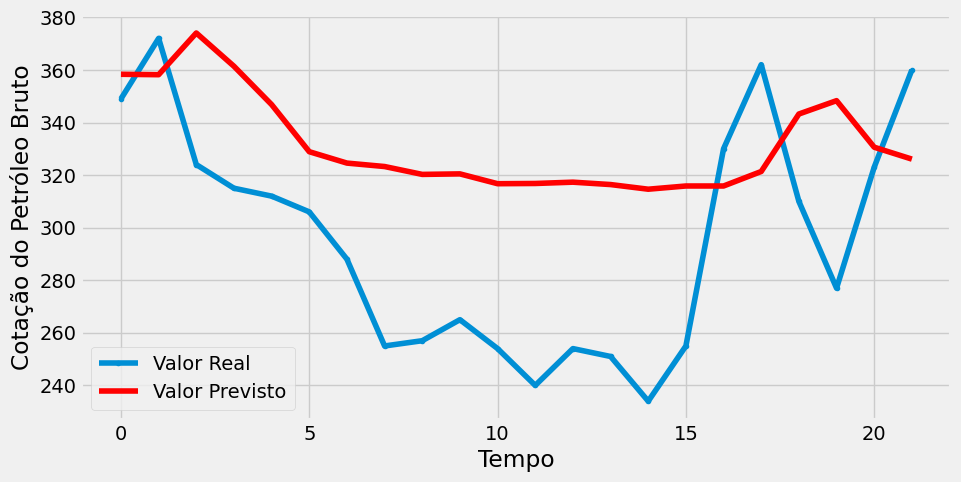

In [59]:
# Plot apenas do valor real x valor previsto
plt.plot(y_test_inv, marker = '.', label = "Valor Real")
plt.plot(y_pred_inv, color = 'red', label = "Valor Previsto")
plt.ylabel('Cotação do Petróleo Bruto')
plt.xlabel('Tempo')
plt.legend()
plt.show();

### Avaliação

Métricas usadas na avaliacão do modelo:

- Mean Directional Accuracy (MDA), ou Acurácia Direcional Média em português, é uma métrica de desempenho usada para avaliar a precisão das previsões de séries temporais em termos da direção das mudanças. Essa métrica é particularmente útil quando a direção da mudança (aumento ou diminuição) é mais importante do que a magnitude da previsão em si. O MDA é calculado comparando as mudanças observadas nos valores reais com as mudanças previstas pelos valores ajustados.


- O Mean Absolute Error (MAE), ou Erro Médio Absoluto em português, é uma métrica de desempenho comumente usada para avaliar a qualidade das previsões em modelos de regressão e séries temporais. O MAE calcula a média das diferenças absolutas entre os valores previstos e os valores reais observados. Essa métrica é particularmente útil para quantificar a magnitude média do erro de previsão, independentemente da direção.


- O Mean Square Error (MSE), ou Erro Quadrático Médio em português, é uma métrica de desempenho comumente usada para avaliar a qualidade das previsões em modelos de regressão e séries temporais. O MSE mede a média das diferenças ao quadrado entre os valores previstos e os valores reais observados. Essa métrica é útil para quantificar a magnitude média do erro de previsão, levando em conta tanto a direção quanto a magnitude dos erros.


- O Root Mean Square Error (RMSE), ou Raiz do Erro Quadrático Médio em português, é uma métrica de desempenho amplamente utilizada para avaliar a qualidade das previsões em modelos de regressão e séries temporais. O RMSE calcula a média das diferenças ao quadrado entre os valores previstos e os valores reais observados, e então calcula a raiz quadrada dessa média. Essa métrica é útil para quantificar a magnitude média do erro de previsão, levando em conta a direção e a magnitude dos erros.


- O Explained Variance Score (EVS), ou pontuação da variância explicada em português, é uma métrica de desempenho usada para avaliar a qualidade das previsões em modelos de regressão. A pontuação da variância explicada mede a proporção da variância total dos valores observados que é explicada pelo modelo de regressão. Essa métrica é útil para quantificar a eficácia do modelo em capturar a estrutura dos dados.

In [60]:
# Mean Directional Accuracy
def mda(actual: np.ndarray, predicted: np.ndarray):
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [61]:
# Imprime as métricas

MDA_mlp = mda(y_test_inv, y_pred_inv)
print('MDA:', MDA_mlp)

MAE_mlp = mean_absolute_error(y_test_inv, y_pred_inv)
print('MAE:', MAE_mlp)

MSE_mlp = mean_squared_error(y_test_inv, y_pred_inv)
print('MSE:', MSE_mlp)

RMSE_mlp = mean_squared_error(y_test_inv, y_pred_inv, squared = False)
print('RMSE:', RMSE_mlp)

EVS_mlp = explained_variance_score(y_test_inv, y_pred_inv)
print('EVS Score:', EVS_mlp)

MDA: 0.5714285714285714
MAE: 45.97303771972656
MSE: 2605.2138033872043
RMSE: 51.04129507944723
EVS Score: 0.29551537744146406


In [62]:
# Salva o modelo
def save_model(model):
    json_model = model.to_json()
    open('modelos/modelo_mlp.json', 'w').write(json_model)
    model.save_weights('modelos/modelo_mlp.h5', overwrite = True)

In [63]:
save_model(modelo_mlp)

# Fim